# Exercise 01 : Line chart with styles

In [1]:
import pandas as pd
import sqlite3

In [2]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

In [3]:
query = """
SELECT datetime
FROM pageviews
WHERE uid LIKE 'user_%'
"""
views = pd.read_sql(query, conn)
views['datetime'] = pd.to_datetime(views['datetime'])
views['date'] = views['datetime'].dt.date
views_count = views.groupby('date').size().reset_index(name='views')
views_count.head()


,date,views
0,2020-04-17,1
1,2020-04-18,23
2,2020-04-19,15
3,2020-04-21,3
4,2020-04-22,1


In [4]:
query = """
SELECT timestamp
FROM checker
WHERE uid LIKE 'user_%'
"""
commits = pd.read_sql(query, conn)
commits['timestamp'] = pd.to_datetime(commits['timestamp'])
commits['date'] = commits['timestamp'].dt.date
commits_count = commits.groupby('date').size().reset_index(name='commits')
commits_count.head()

,date,commits
0,2020-04-17,23
1,2020-04-18,69
2,2020-04-19,33
3,2020-04-20,25
4,2020-04-21,25


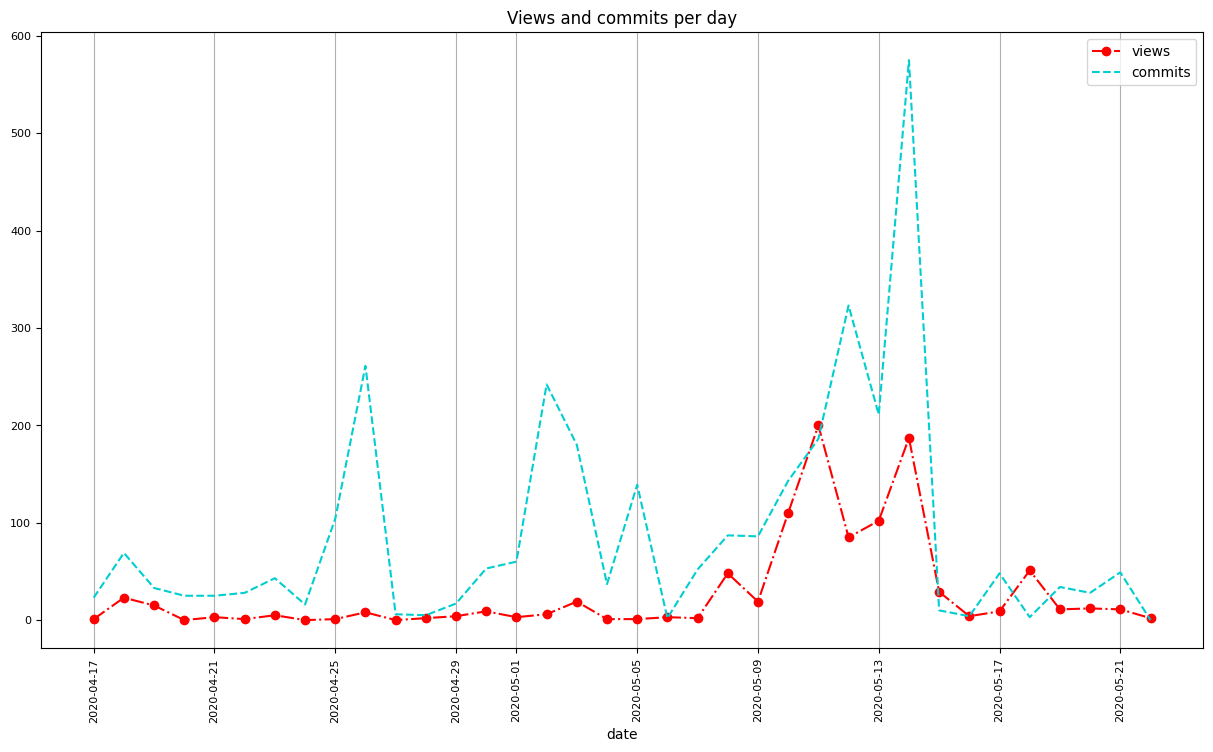

In [5]:
df = pd.merge(views_count, commits_count, on='date', how='outer').fillna(0)

ax = df.plot(x='date', y='views', kind='line', figsize=(15, 8), title='Views and commits per day', fontsize=8, rot=90, style='ro-.')
df.plot(x='date', y='commits', kind='line', ax=ax, color='darkturquoise', style='--', rot=90)

ax.grid(axis='x')

In [6]:
conn.close()

## How many times was the number of views larger than 150?

In [7]:
print(f"The answer is {(views_count['views'] > 150).sum()}")

The answer is 2
